### 6. GBDT Model Training and Test

In [1]:
# import libraries used

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder, LabelEncoder

import swifter
import gc

In [2]:
# Load processed dataset.

data = pd.read_pickle('v30_data.pkl')

In [3]:
# train, validation, test data set parameter setting.

test_date_block = 34
val_date_block = test_date_block - 1
train_date_block = val_date_block - 1

In [4]:
high_loss_shops = [20, 9, 25, 31, 42, 28, 55]
#normal_shops = list(set(data.shop_id.unique()) - set(high_loss_shops))
normal_shops = list(set(data.shop_id.unique()))

In [5]:
drop_list = data.loc[data.time_on_market < 0].index
data.drop(drop_list, inplace=True)
data

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,avg_date_shop_cat_price_cnt_lag_2,avg_date_shop_cat_price_cnt_lag_3,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days
0,0,2,19,1,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
1,0,2,27,1,7,19,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
2,0,2,28,1,7,30,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
3,0,2,29,1,7,23,0.0,0.588259,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
4,0,2,32,1,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126961,34,45,18454,22,7,55,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,28.453125,15.976562,22.234375,10,30
11126962,34,45,16188,22,7,64,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,13.890625,12.437500,24.453125,10,30
11126963,34,45,15757,22,7,55,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,28.453125,15.976562,22.234375,10,30
11126964,34,45,19648,22,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,21.687500,16.343750,22.078125,10,30


In [6]:
drop_list = data.loc[data.shop_on_market < 0].index
data.drop(drop_list, inplace=True)
data

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,avg_date_shop_cat_price_cnt_lag_2,avg_date_shop_cat_price_cnt_lag_3,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days
0,0,2,19,1,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
1,0,2,27,1,7,19,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
2,0,2,28,1,7,30,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
3,0,2,29,1,7,23,0.0,0.588259,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
4,0,2,32,1,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126961,34,45,18454,22,7,55,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,28.453125,15.976562,22.234375,10,30
11126962,34,45,16188,22,7,64,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,13.890625,12.437500,24.453125,10,30
11126963,34,45,15757,22,7,55,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,28.453125,15.976562,22.234375,10,30
11126964,34,45,19648,22,7,40,0.0,0.000000,0.0,0.000000,...,0.0,0.0,854.5,866.0,655.0,21.687500,16.343750,22.078125,10,30


#### 6.1 On Sale Model Training

#### 6.1.1 All Samples Model

In [7]:
on_sale_data = data.copy()

In [8]:
drop_list_on_sale = [
    'days',
    'shop_city',
    'avg_date_city_item_cnt_lag_1',
    'avg_date_city_item_cnt_lag_2',
    'avg_date_city_item_cnt_lag_3',
    'shop_item_on_market',
    #'shop_item_no_sale',
    #'avg_date_item_price_cnt_lag_1',
    'avg_date_item_price_cnt_lag_2',
    'avg_date_item_price_cnt_lag_3',
    #'avg_date_shop_item_price_cnt_lag_1',
    'avg_date_shop_item_price_cnt_lag_2',
    'avg_date_shop_item_price_cnt_lag_3',
    #'avg_date_cat_price_cnt_lag_1',
    'avg_date_cat_price_cnt_lag_2',
    'avg_date_cat_price_cnt_lag_3',
    #'avg_date_shop_cat_price_cnt_lag_1',
    'avg_date_shop_cat_price_cnt_lag_2',
    'avg_date_shop_cat_price_cnt_lag_3',
    'date_item_price_lag_2',
    'date_item_price_lag_3',
    'date_shop_item_price_lag_2',
    'date_shop_item_price_lag_3',
    #'date_shop_revenue_lag_1',
    'date_shop_revenue_lag_2',
    'date_shop_revenue_lag_3',
    #'date_shop_cat_revenue_lag_1',
    'date_shop_cat_revenue_lag_2',
    'date_shop_cat_revenue_lag_3',
]

on_sale_data.drop(drop_list_on_sale, axis=1, inplace=True)

In [9]:
#just extract the samples within the test dataset

'''
#just extract the samples within the test dataset
shop_list = list(on_sale_data[(on_sale_data.date_block_num == test_date_block) | \
                              (on_sale_data.date_block_num == val_date_block)].shop_id.unique())
item_list = list(on_sale_data[(on_sale_data.date_block_num == test_date_block) | \
                              (on_sale_data.date_block_num == val_date_block)].item_id.unique())

on_sale_data = on_sale_data[on_sale_data.shop_id.isin(shop_list)]
on_sale_data = on_sale_data[on_sale_data.item_id.isin(item_list)]

'''

'\n#just extract the samples within the test dataset\nshop_list = list(on_sale_data[(on_sale_data.date_block_num == test_date_block) |                               (on_sale_data.date_block_num == val_date_block)].shop_id.unique())\nitem_list = list(on_sale_data[(on_sale_data.date_block_num == test_date_block) |                               (on_sale_data.date_block_num == val_date_block)].item_id.unique())\n\non_sale_data = on_sale_data[on_sale_data.shop_id.isin(shop_list)]\non_sale_data = on_sale_data[on_sale_data.item_id.isin(item_list)]\n\n'

In [10]:
on_sale_data = on_sale_data[on_sale_data.time_on_market > 0]

In [11]:
X_train_on_sale = on_sale_data[(on_sale_data.date_block_num <= train_date_block) & \
                           on_sale_data.shop_id.isin(normal_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_train_on_sale = on_sale_data[(on_sale_data.date_block_num <= train_date_block)& \
                           on_sale_data.shop_id.isin(normal_shops)]['date_shop_item_cnt']
X_valid_on_sale = on_sale_data[(on_sale_data.date_block_num == val_date_block) & \
                           on_sale_data.shop_id.isin(normal_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_valid_on_sale = on_sale_data[(on_sale_data.date_block_num == val_date_block) & \
                           on_sale_data.shop_id.isin(normal_shops)]['date_shop_item_cnt']

In [12]:
import lightgbm as lgb

dt = lgb.Dataset(X_train_on_sale, Y_train_on_sale)
dv = lgb.Dataset(X_valid_on_sale, Y_valid_on_sale)

params = {'metric': 'rmse',
          'boosting':'gbdt',
          'num_leaves': 255,
          'learning_rate': 0.1,
          'num_iterations':250,
          'feature_fraction': 0.7,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'min_split_gain':1,
          'force_col_wise' : True,
          'max_depth' : 10,
          'min_data_in_leaf':100,
          'max_bin':255,
          'early_stopping_rounds':100,
          'n_estimators':100,
          'random_state': 10
}

features = [
    'date_block_num',
    'shop_id',
    #'shop_city',
    'shop_type',
    'item_category_id', 
    'cat_type',
    'sub_type',
    'month',
]

lgb_on_sale = lgb.train(params=params,
                      train_set=dt,
                      valid_sets=(dt, dv),
                      categorical_feature=features,
                      verbose_eval=100)      

/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/basic.py:1706: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_type', 'date_block_n

[LightGBM] [Info] Total Bins 9697
[LightGBM] [Info] Number of data points in the train set: 9692162, number of used features: 73


/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/shirong/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 0.276804
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

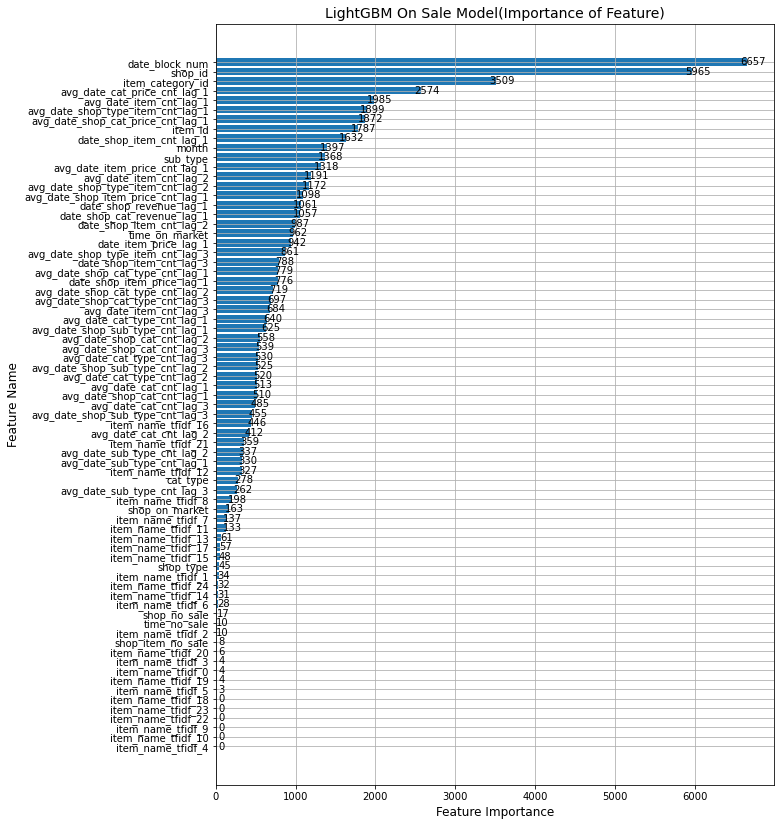

In [13]:
import matplotlib.pylab as plt

importance = lgb_on_sale.feature_importance(importance_type='split')
feature_importance = np.sort(importance)
index = np.argsort(importance)

features = lgb_on_sale.feature_name()
feature_names = np.array([])
for i in range(len(index)):
    feature_names = np.append(feature_names, features[index[i]])

plt.figure(figsize=(10, 14))
plt.barh(feature_names, feature_importance)
plt.title("LightGBM On Sale Model(Importance of Feature)", fontsize=14)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature Name",fontsize=12)
plt.grid(b=True)

for i, im in enumerate(feature_importance):
    plt.text(im+70, i-0.5, '%.0f'%im, ha='center',va='bottom')

plt.savefig('./lgb_on_sale.jpg',bbox_inches='tight')
plt.show()


#### 6.1.2 High Loss Shops

In [14]:
# prepare training dataset.

X_train_on_sale_hl = on_sale_data[(on_sale_data.date_block_num <= train_date_block)& \
                           on_sale_data.shop_id.isin(high_loss_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_train_on_sale_hl = on_sale_data[(on_sale_data.date_block_num <= train_date_block)& \
                           on_sale_data.shop_id.isin(high_loss_shops)]['date_shop_item_cnt']
X_valid_on_sale_hl = on_sale_data[(on_sale_data.date_block_num == val_date_block)& \
                           on_sale_data.shop_id.isin(high_loss_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_valid_on_sale_hl = on_sale_data[(on_sale_data.date_block_num == val_date_block)& \
                           on_sale_data.shop_id.isin(high_loss_shops)]['date_shop_item_cnt']

In [15]:
import lightgbm as lgb

dt = lgb.Dataset(X_train_on_sale_hl, Y_train_on_sale_hl)
dv = lgb.Dataset(X_valid_on_sale_hl, Y_valid_on_sale_hl)

params = {'metric': 'rmse',
          'boosting':'gbdt',
          'num_leaves': 255,
          'learning_rate': 0.1,
          'num_iterations':250,
          'feature_fraction': 0.7,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'min_split_gain':1,
          'force_col_wise' : True,
          'max_depth' : 10,
          'min_data_in_leaf':100,
          'max_bin':255,
          'early_stopping_rounds':100,
          'n_estimators':100,
          'random_state': 10
}

features = [
    'date_block_num',
    'shop_id',
    #'shop_city',
    'shop_type',
    'item_category_id', 
    'cat_type',
    'sub_type',
    'month',
]

lgb_on_sale_hl = lgb.train(params=params,
                      train_set=dt,
                      valid_sets=(dt, dv),
                      categorical_feature=features,
                      verbose_eval=100)      

[LightGBM] [Info] Total Bins 9531
[LightGBM] [Info] Number of data points in the train set: 1037929, number of used features: 73
[LightGBM] [Info] Start training from score 0.638199
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

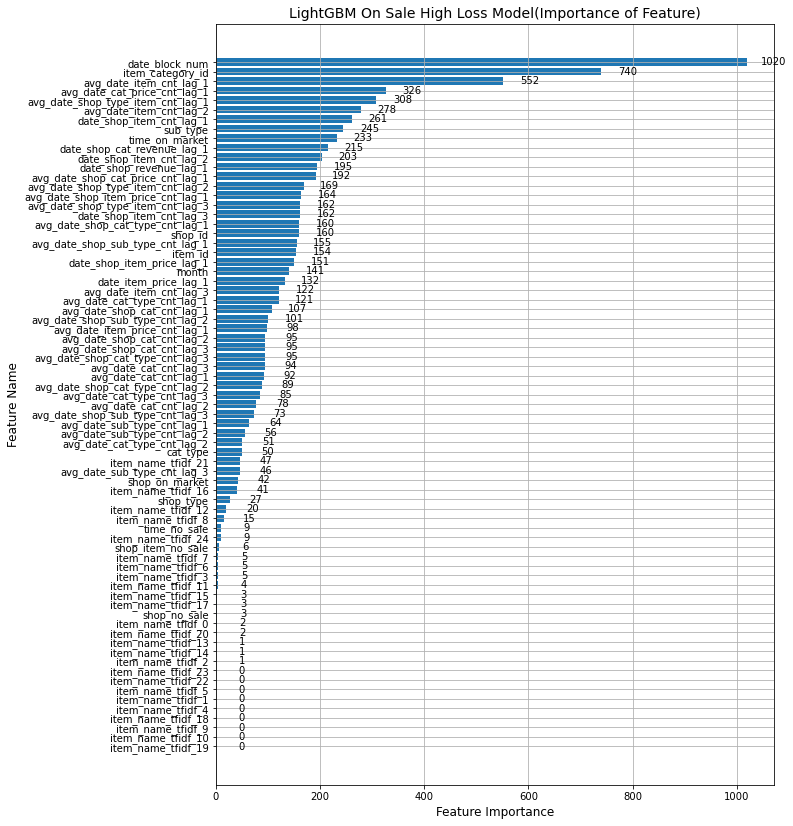

In [16]:
import matplotlib.pylab as plt

importance = lgb_on_sale_hl.feature_importance(importance_type='split')
feature_importance = np.sort(importance)
index = np.argsort(importance)

features = lgb_on_sale_hl.feature_name()
feature_names = np.array([])
for i in range(len(index)):
    feature_names = np.append(feature_names, features[index[i]])

plt.figure(figsize=(10, 14))
plt.barh(feature_names, feature_importance)
plt.title("LightGBM On Sale High Loss Model(Importance of Feature)", fontsize=14)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature Name",fontsize=12)
plt.grid(b=True)

for i, im in enumerate(feature_importance):
    plt.text(im+50, i-0.5, '%.0f'%im, ha='center',va='bottom')

plt.savefig('./lgb_on_sale_hl.jpg',bbox_inches='tight')
plt.show()



#### 6.2 First Sale Model Training

#### 6.2.1 All Samples

In [17]:
first_sale_data = data.copy()

In [18]:
drop_list_first_sale = [
    'days',
    'shop_city',
    'avg_date_city_item_cnt_lag_1',
    'avg_date_city_item_cnt_lag_2',
    'avg_date_city_item_cnt_lag_3',
    #'time_on_market',
    #'time_no_sale',
    'shop_item_on_market',
    #'shop_item_no_sale',
    'date_shop_item_cnt_lag_1',
    'date_shop_item_cnt_lag_2',
    'date_shop_item_cnt_lag_3',
    'avg_date_item_cnt_lag_1',
    'avg_date_item_cnt_lag_2',
    'avg_date_item_cnt_lag_3',
    'avg_date_shop_type_item_cnt_lag_1',
    'avg_date_shop_type_item_cnt_lag_2',
    'avg_date_shop_type_item_cnt_lag_3',
    'avg_date_city_item_cnt_lag_1',
    'avg_date_city_item_cnt_lag_2',
    'avg_date_city_item_cnt_lag_3',
    'avg_date_item_price_cnt_lag_1',
    'avg_date_item_price_cnt_lag_2',
    'avg_date_item_price_cnt_lag_3',
    'avg_date_shop_item_price_cnt_lag_1',
    'avg_date_shop_item_price_cnt_lag_2',
    'avg_date_shop_item_price_cnt_lag_3',
    'avg_date_cat_price_cnt_lag_1',
    'avg_date_cat_price_cnt_lag_2',
    'avg_date_cat_price_cnt_lag_3',
    'avg_date_shop_cat_price_cnt_lag_1',
    'avg_date_shop_cat_price_cnt_lag_2',
    'avg_date_shop_cat_price_cnt_lag_3',
    'date_item_price_lag_1',
    'date_item_price_lag_2',
    'date_item_price_lag_3',
    'date_shop_item_price_lag_1',
    'date_shop_item_price_lag_2',
    'date_shop_item_price_lag_3',
    #'date_shop_revenue_lag_1',
    'date_shop_revenue_lag_2',
    'date_shop_revenue_lag_3',
    #'date_shop_cat_revenue_lag_1',
    'date_shop_cat_revenue_lag_2',
    'date_shop_cat_revenue_lag_3',
]

first_sale_data.drop(drop_list_first_sale, axis=1, inplace=True)

In [19]:
'''
shop_list = list(first_sale_data[first_sale_data.date_block_num == test_date_block].shop_id.unique())
item_list = list(first_sale_data[first_sale_data.date_block_num == test_date_block].item_id.unique())

first_sale_data = first_sale_data[first_sale_data.shop_id.isin(shop_list)]
first_sale_data = first_sale_data[first_sale_data.item_id.isin(item_list)]
'''

'\nshop_list = list(first_sale_data[first_sale_data.date_block_num == test_date_block].shop_id.unique())\nitem_list = list(first_sale_data[first_sale_data.date_block_num == test_date_block].item_id.unique())\n\nfirst_sale_data = first_sale_data[first_sale_data.shop_id.isin(shop_list)]\nfirst_sale_data = first_sale_data[first_sale_data.item_id.isin(item_list)]\n'

In [20]:
first_sale_data = first_sale_data[(first_sale_data.time_on_market  < 3)]

In [21]:
X_train_first_sale = first_sale_data[(first_sale_data.date_block_num <= train_date_block) & \
                           first_sale_data.shop_id.isin(normal_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_train_first_sale = first_sale_data[(first_sale_data.date_block_num <= train_date_block)  & \
                           first_sale_data.shop_id.isin(normal_shops)]['date_shop_item_cnt']
X_valid_first_sale = first_sale_data[(first_sale_data.date_block_num == val_date_block) & \
                           (first_sale_data.time_on_market == 0) & \
                           first_sale_data.shop_id.isin(normal_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_valid_first_sale = first_sale_data[(first_sale_data.date_block_num == val_date_block) & \
                           (first_sale_data.time_on_market == 0) & \
                           first_sale_data.shop_id.isin(normal_shops)]['date_shop_item_cnt']

In [22]:
X_train_first_sale_ft = X_train_first_sale.drop(['item_id'], axis=1)
Y_train_first_sale_ft = Y_train_first_sale.copy()
X_valid_first_sale_ft = X_valid_first_sale.drop(['item_id'], axis=1)
Y_valid_first_sale_ft = Y_valid_first_sale.copy()

In [23]:
import lightgbm as lgb

dt = lgb.Dataset(X_train_first_sale_ft, Y_train_first_sale_ft)
dv = lgb.Dataset(X_valid_first_sale_ft, Y_valid_first_sale_ft)

params = {'metric': 'rmse',
          'boosting':'gbdt',
          'num_leaves': 128,
          'learning_rate': 0.1,
          'num_iterations':1000,
          'feature_fraction': 0.7,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'min_split_gain':1,
          'force_col_wise' : True,
          'max_depth' : 10,
          'min_data_in_leaf':80,
          'max_bin':255,
          'early_stopping_rounds':100,
          'n_estimators':100,
          'random_state': 10
}

features = [
    'date_block_num',
    'shop_id',
    #'shop_city',
    'shop_type',
    'item_category_id', 
    'cat_type',
    'sub_type',
    'month',
]

lgb_first_sale = lgb.train(params=params,
                      train_set=dt,
                      valid_sets=(dt, dv),
                      categorical_feature=features,
                      verbose_eval=100)      

[LightGBM] [Info] Total Bins 7204
[LightGBM] [Info] Number of data points in the train set: 2401798, number of used features: 57
[LightGBM] [Info] Start training from score 0.513481
Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.45029	valid_1's rmse: 1.63553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	training's rmse: 1.42127	valid_1's rmse: 1.62175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

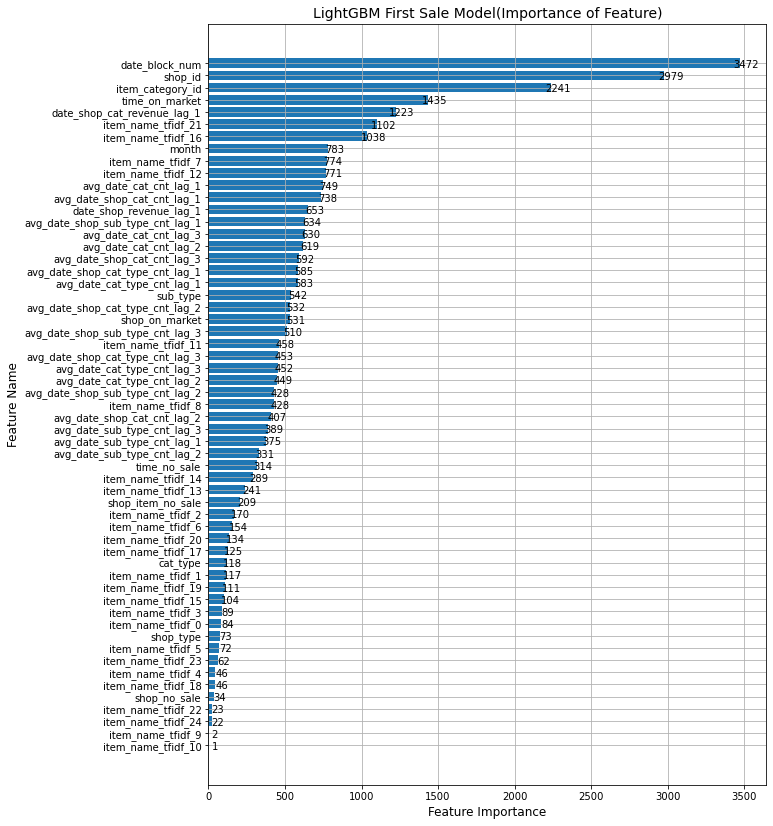

In [24]:
import matplotlib.pylab as plt

importance = lgb_first_sale.feature_importance(importance_type='split')
feature_importance = np.sort(importance)
index = np.argsort(importance)

features = lgb_first_sale.feature_name()
feature_names = np.array([])
for i in range(len(index)):
    feature_names = np.append(feature_names, features[index[i]])

plt.figure(figsize=(10, 14))
plt.barh(feature_names, feature_importance)
plt.title("LightGBM First Sale Model(Importance of Feature)", fontsize=14)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature Name",fontsize=12)
plt.grid(b=True)

for i, im in enumerate(feature_importance):
    plt.text(im+40, i-0.5, '%.0f'%im, ha='center',va='bottom')

plt.savefig('./lgb_first_sale.jpg',bbox_inches='tight')
plt.show()

#### 6.2.2 High Loss Shops

In [25]:
X_train_first_sale_hl = first_sale_data[(first_sale_data.date_block_num <= train_date_block)  & \
                               first_sale_data.shop_id.isin(high_loss_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_train_first_sale_hl = first_sale_data[(first_sale_data.date_block_num <= train_date_block)  & \
                               first_sale_data.shop_id.isin(high_loss_shops)]['date_shop_item_cnt']
X_valid_first_sale_hl = first_sale_data[(first_sale_data.date_block_num == val_date_block) & \
                               (first_sale_data.time_on_market == 0) & \
                               first_sale_data.shop_id.isin(high_loss_shops)].drop(['date_shop_item_cnt'], axis=1)
Y_valid_first_sale_hl = first_sale_data[(first_sale_data.date_block_num == val_date_block) & \
                               (first_sale_data.time_on_market == 0)  & \
                               first_sale_data.shop_id.isin(high_loss_shops)]['date_shop_item_cnt']

In [26]:
X_train_first_sale_hl_ft = X_train_first_sale_hl.drop(['item_id'], axis=1)
Y_train_first_sale_hl_ft = Y_train_first_sale_hl.copy()
X_valid_first_sale_hl_ft = X_valid_first_sale_hl.drop(['item_id'], axis=1)
Y_valid_first_sale_hl_ft = Y_valid_first_sale_hl.copy()

In [27]:
import lightgbm as lgb

dt = lgb.Dataset(X_train_first_sale_hl_ft, Y_train_first_sale_hl_ft)
dv = lgb.Dataset(X_valid_first_sale_hl_ft, Y_valid_first_sale_hl_ft)

params = {'metric': 'rmse',
          'boosting':'gbdt',
          'num_leaves': 128,
          'learning_rate': 0.1,
          'num_iterations':1000,
          'feature_fraction': 0.7,
          'bagging_fraction': 0.7,
          'bagging_freq': 5,
          'min_split_gain':1,
          'force_col_wise' : True,
          'max_depth' : 10,
          'min_data_in_leaf':80,
          'max_bin':255,
          'early_stopping_rounds':100,
          'n_estimators':100,
          'random_state': 10
}

features = [
    'date_block_num',
    'shop_id',
    'item_category_id',
    #'time_on_market',
    #'shop_on_market',
    #'shop_no_sale',
    #'time_no_sale',
    #'no_sale',
    #'shop_city',
    'shop_type',
    'cat_type',
    'sub_type',
    'month',
]

lgb_first_sale_hl = lgb.train(params=params,
                      train_set=dt,
                      valid_sets=(dt, dv),
                      categorical_feature=features,
                      verbose_eval=100)      

[LightGBM] [Info] Total Bins 7087
[LightGBM] [Info] Number of data points in the train set: 236884, number of used features: 57
[LightGBM] [Info] Start training from score 1.255636
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

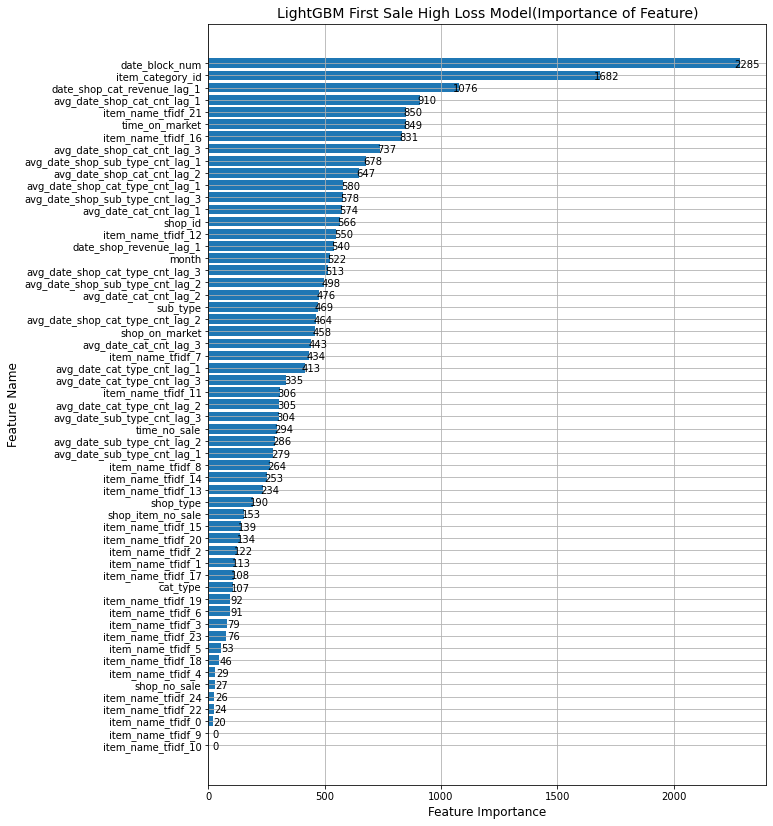

In [28]:
import matplotlib.pylab as plt

importance = lgb_first_sale_hl.feature_importance(importance_type='split')
feature_importance = np.sort(importance)
index = np.argsort(importance)

features = lgb_first_sale_hl.feature_name()
feature_names = np.array([])
for i in range(len(index)):
    feature_names = np.append(feature_names, features[index[i]])

plt.figure(figsize=(10, 14))
plt.barh(feature_names, feature_importance)
plt.title("LightGBM First Sale High Loss Model(Importance of Feature)", fontsize=14)
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Feature Name",fontsize=12)
plt.grid(b=True)

for i, im in enumerate(feature_importance):
    plt.text(im+30, i-0.5, '%.0f'%im, ha='center',va='bottom')

plt.savefig('./lgb_first_sale_hl.jpg',bbox_inches='tight')
plt.show()

#### 6.3 Validation

In [29]:
#Y_pred_on_sale_lgb = lgb_on_sale.predict(X_valid_on_sale_ft).clip(0,20)
#Y_pred_on_sale_xgb = xgb_on_sale.predict(X_valid_on_sale_ft).clip(0,20)
#Y_pred_on_sale = 0.67*Y_pred_on_sale_lgb + 0.33*Y_pred_on_sale_xgb
#Y_pred_on_sale = ridge_on_sale.predict(X_valid_on_sale_ft).clip(0,20)[:,2]

Y_pred_on_sale = lgb_on_sale.predict(X_valid_on_sale).clip(0,20)

X_valid_on_sale = X_valid_on_sale[['shop_id', 'item_id']]
X_valid_on_sale['Y_pred_on_sale'] = Y_pred_on_sale
X_valid_on_sale

,shop_id,item_id,Y_pred_on_sale
10674594,2,30,0.000000
10674595,2,31,1.106004
10674596,2,32,0.000000
10674597,2,33,0.000000
10674598,2,40,0.000000
...,...,...,...
10912761,59,22162,0.000000
10912762,59,22163,0.000000
10912763,59,22164,0.003510
10912764,59,22166,0.000000


In [30]:
Y_pred_on_sale_hl = lgb_on_sale_hl.predict(X_valid_on_sale_hl).clip(0,20)
X_valid_on_sale_hl = X_valid_on_sale_hl[['shop_id', 'item_id']]
X_valid_on_sale_hl['Y_pred_on_sale_hl'] = Y_pred_on_sale_hl
X_valid_on_sale_hl

,shop_id,item_id,Y_pred_on_sale_hl
10707072,9,30,0.001972
10707073,9,31,0.000389
10707074,9,32,0.000681
10707075,9,33,0.000000
10707076,9,40,0.003310
...,...,...,...
10891109,55,22162,0.005299
10891110,55,22163,0.007317
10891111,55,22164,0.005299
10891112,55,22166,6.817062


In [31]:
#Y_pred_first_sale_lgb = lgb_first_sale.predict(X_valid_first_sale_ft).clip(0,20)
#Y_pred_first_sale_xgb = xgb_first_sale.predict(X_valid_first_sale_ft).clip(0,20)
#Y_pred_first_sale = 0.67 * Y_pred_first_sale_lgb + 0.33 * Y_pred_first_sale_xgb

Y_pred_first_sale = lgb_first_sale.predict(X_valid_first_sale_ft).clip(0,20)

X_valid_first_sale = X_valid_first_sale[['shop_id', 'item_id']]
X_valid_first_sale['Y_pred_first_sale'] = Y_pred_first_sale
X_valid_first_sale

,shop_id,item_id,Y_pred_first_sale
10674617,2,138,0.000000
10674618,2,139,0.000000
10674619,2,146,0.000000
10674620,2,147,0.000000
10674626,2,159,0.000000
...,...,...,...
10912723,59,21973,0.026403
10912731,59,22004,0.404030
10912732,59,22005,0.404030
10912733,59,22006,0.404030


In [32]:
Y_pred_first_sale_hl = lgb_first_sale_hl.predict(X_valid_first_sale_hl_ft).clip(0,20)

X_valid_first_sale_hl = X_valid_first_sale_hl[['shop_id', 'item_id']]
X_valid_first_sale_hl['Y_pred_first_sale_hl'] = Y_pred_first_sale_hl
X_valid_first_sale_hl

,shop_id,item_id,Y_pred_first_sale_hl
10707095,9,138,0.034450
10707096,9,139,0.034450
10707097,9,146,0.000000
10707098,9,147,0.000000
10707104,9,159,0.000000
...,...,...,...
10891071,55,21973,0.010312
10891079,55,22004,0.000000
10891080,55,22005,0.000000
10891081,55,22006,0.000000


In [33]:
Y_valid = data[data.date_block_num == val_date_block]

'''
shop_list = list(data[data.date_block_num == test_date_block].shop_id.unique())
item_list = list(data[data.date_block_num == test_date_block].item_id.unique())
Y_valid = Y_valid[Y_valid.shop_id.isin(shop_list)]
Y_valid = Y_valid[Y_valid.item_id.isin(item_list)]
'''
Y_valid

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,avg_date_shop_cat_price_cnt_lag_2,avg_date_shop_cat_price_cnt_lag_3,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days
10674594,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,0.0,0.0,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31
10674595,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,0.0,0.0,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31
10674596,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,0.0,0.0,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31
10674597,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,0.0,0.0,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31
10674598,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,0.0,0.0,1257.0,986.0,987.0,0.000000,0.000000,0.000000,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912761,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,0.0,0.0,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31
10912762,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,0.0,0.0,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31
10912763,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,0.0,0.0,1097.0,939.0,855.0,18.828125,21.921875,22.687500,9,31
10912764,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,0.0,0.0,1097.0,939.0,855.0,0.000000,0.000000,0.000000,9,31


In [34]:
Y_valid = pd.merge(Y_valid, X_valid_on_sale, on=['shop_id', 'item_id'], how='left')
Y_valid = pd.merge(Y_valid, X_valid_on_sale_hl, on=['shop_id', 'item_id'], how='left')
Y_valid

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred_on_sale,Y_pred_on_sale_hl
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,NaN
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,1.106004,NaN
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,NaN
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,0.000000,NaN
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,0.000000,0.000000,0.000000,9,31,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,NaN
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,NaN
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,1097.0,939.0,855.0,18.828125,21.921875,22.687500,9,31,0.003510,NaN
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,1097.0,939.0,855.0,0.000000,0.000000,0.000000,9,31,0.000000,NaN


In [35]:
Y_valid = pd.merge(Y_valid, X_valid_first_sale, on=['shop_id', 'item_id'], how='left')
Y_valid = pd.merge(Y_valid, X_valid_first_sale_hl, on=['shop_id', 'item_id'], how='left')
Y_valid

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred_on_sale,Y_pred_on_sale_hl,Y_pred_first_sale,Y_pred_first_sale_hl
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,987.0,11.531250,18.203125,17.421875,9,31,0.000000,NaN,NaN,NaN
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,987.0,19.828125,17.687500,10.820312,9,31,1.106004,NaN,NaN,NaN
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,987.0,11.531250,18.203125,17.421875,9,31,0.000000,NaN,NaN,NaN
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,987.0,19.828125,17.687500,10.820312,9,31,0.000000,NaN,NaN,NaN
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,987.0,0.000000,0.000000,0.000000,9,31,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,855.0,26.859375,23.781250,24.171875,9,31,0.000000,NaN,NaN,NaN
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,855.0,26.859375,23.781250,24.171875,9,31,0.000000,NaN,NaN,NaN
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,855.0,18.828125,21.921875,22.687500,9,31,0.003510,NaN,NaN,NaN
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,855.0,0.000000,0.000000,0.000000,9,31,0.000000,NaN,NaN,NaN


In [36]:
def merge_prediction(row):
    if pd.isnull(row.Y_pred_first_sale):
        if pd.isnull(row.Y_pred_on_sale_hl):
            return row.Y_pred_on_sale
        else:
            return row.Y_pred_on_sale_hl
    else:
        if pd.isnull(row.Y_pred_first_sale_hl):
            return row.Y_pred_first_sale
        else:
            return row.Y_pred_first_sale_hl

Y_valid['Y_pred'] = Y_valid.swifter.apply(merge_prediction, axis=1).fillna(0).astype(np.float16)

del Y_valid['Y_pred_first_sale']
del Y_valid['Y_pred_on_sale']
del Y_valid['Y_pred_first_sale_hl']
del Y_valid['Y_pred_on_sale_hl']

Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,avg_date_shop_cat_price_cnt_lag_3,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,0.0,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,0.0,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,1.106445
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,0.0,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,0.0,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,0.000000
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,0.0,1257.0,986.0,987.0,0.000000,0.000000,0.000000,9,31,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,0.0,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,0.0,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,0.0,1097.0,939.0,855.0,18.828125,21.921875,22.687500,9,31,0.003510
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,0.0,1097.0,939.0,855.0,0.000000,0.000000,0.000000,9,31,0.000000


In [37]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_valid['date_shop_item_cnt'], Y_valid['Y_pred']))

print("The final rmse is {}".format(rmse))

The final rmse is 0.720703125


#### 6.5 Error Analysis

#### 6.5.1 RMSE Calculation

In [38]:
df_item_id_rmse = Y_valid[['item_id', 'date_shop_item_cnt', 'Y_pred']].reset_index(drop=True)
item_id_rmse = [-1] * (Y_valid.item_id.max() + 1)

for index, row in df_item_id_rmse.iterrows():
    if item_id_rmse[int(row.item_id)] == -1:
        item_id_rmse[int(row.item_id)] = np.sqrt(mean_squared_error(
            df_item_id_rmse[df_item_id_rmse.item_id == row.item_id]['date_shop_item_cnt'], 
            df_item_id_rmse[df_item_id_rmse.item_id == row.item_id]['Y_pred']
        ))

def apply_item_id_rmse(row):
    return item_id_rmse[int(row.item_id)]

Y_valid['item_id_rmse'] = Y_valid.swifter.apply(apply_item_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,date_shop_revenue_lag_1,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred,item_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.028427
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,1.106445,0.267090
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.345947
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,1257.0,986.0,987.0,19.828125,17.687500,10.820312,9,31,0.000000,0.218872
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,1257.0,986.0,987.0,0.000000,0.000000,0.000000,9,31,0.000000,0.029739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.193359
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,1097.0,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.531250
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,1097.0,939.0,855.0,18.828125,21.921875,22.687500,9,31,0.003510,0.379150
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,1097.0,939.0,855.0,0.000000,0.000000,0.000000,9,31,0.000000,0.630859


In [39]:
df_shop_id_rmse = Y_valid[['shop_id', 'date_shop_item_cnt', 'Y_pred']].reset_index(drop=True)
shop_id_rmse = [-1] * (Y_valid.shop_id.max() + 1)

for index, row in df_shop_id_rmse.iterrows():
    if shop_id_rmse[int(row.shop_id)] == -1:
        shop_id_rmse[int(row.shop_id)] = np.sqrt(mean_squared_error(
            df_shop_id_rmse[df_shop_id_rmse.shop_id == row.shop_id]['date_shop_item_cnt'], 
            df_shop_id_rmse[df_shop_id_rmse.shop_id == row.shop_id]['Y_pred']
        ))

def apply_shop_id_rmse(row):
    return shop_id_rmse[int(row.shop_id)]

Y_valid['shop_id_rmse'] = Y_valid.swifter.apply(apply_shop_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,date_shop_revenue_lag_2,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred,item_id_rmse,shop_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.028427,0.483154
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,986.0,987.0,19.828125,17.687500,10.820312,9,31,1.106445,0.267090,0.483154
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,986.0,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.345947,0.483154
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,986.0,987.0,19.828125,17.687500,10.820312,9,31,0.000000,0.218872,0.483154
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,986.0,987.0,0.000000,0.000000,0.000000,9,31,0.000000,0.029739,0.483154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.193359,0.389648
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,939.0,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.531250,0.389648
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,939.0,855.0,18.828125,21.921875,22.687500,9,31,0.003510,0.379150,0.389648
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,939.0,855.0,0.000000,0.000000,0.000000,9,31,0.000000,0.630859,0.389648


In [40]:
df_cat_id_rmse = Y_valid[['item_category_id', 'date_shop_item_cnt', 'Y_pred']].reset_index(drop=True)
cat_id_rmse = [-1] * (Y_valid.item_category_id.max() + 1)

for index, row in df_cat_id_rmse.iterrows():
    if cat_id_rmse[int(row.item_category_id)] == -1:
        cat_id_rmse[int(row.item_category_id)] = np.sqrt(mean_squared_error(
            df_cat_id_rmse[df_cat_id_rmse.item_category_id == row.item_category_id]['date_shop_item_cnt'], 
            df_cat_id_rmse[df_cat_id_rmse.item_category_id == row.item_category_id]['Y_pred']
        ))

def apply_cat_id_rmse(row):
    return cat_id_rmse[int(row.item_category_id)]

Y_valid['cat_id_rmse'] = Y_valid.swifter.apply(apply_cat_id_rmse, axis=1).astype(np.float16) 
Y_valid

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

,date_block_num,shop_id,item_id,shop_city,shop_type,item_category_id,item_name_tfidf_0,item_name_tfidf_1,item_name_tfidf_2,item_name_tfidf_3,...,date_shop_revenue_lag_3,date_shop_cat_revenue_lag_1,date_shop_cat_revenue_lag_2,date_shop_cat_revenue_lag_3,month,days,Y_pred,item_id_rmse,shop_id_rmse,cat_id_rmse
0,33,2,30,1,7,40,0.000000,0.0,0.0,0.0,...,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.028427,0.483154,0.523438
1,33,2,31,1,7,37,0.000000,0.0,0.0,1.0,...,987.0,19.828125,17.687500,10.820312,9,31,1.106445,0.267090,0.483154,0.567871
2,33,2,32,1,7,40,0.000000,0.0,0.0,0.0,...,987.0,11.531250,18.203125,17.421875,9,31,0.000000,0.345947,0.483154,0.523438
3,33,2,33,1,7,37,0.000000,0.0,0.0,1.0,...,987.0,19.828125,17.687500,10.820312,9,31,0.000000,0.218872,0.483154,0.567871
4,33,2,40,1,7,57,0.000000,0.0,0.0,0.0,...,987.0,0.000000,0.000000,0.000000,9,31,0.000000,0.029739,0.483154,0.147095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,33,59,22162,32,7,40,0.000000,0.0,0.0,0.0,...,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.193359,0.389648,0.523438
238168,33,59,22163,32,7,40,0.000000,0.0,0.0,0.0,...,855.0,26.859375,23.781250,24.171875,9,31,0.000000,0.531250,0.389648,0.523438
238169,33,59,22164,32,7,37,0.000000,0.0,0.0,1.0,...,855.0,18.828125,21.921875,22.687500,9,31,0.003510,0.379150,0.389648,0.567871
238170,33,59,22166,32,7,54,0.672513,0.0,0.0,0.0,...,855.0,0.000000,0.000000,0.000000,9,31,0.000000,0.630859,0.389648,0.484619


In [41]:
Y_valid.to_csv('v30_rmse_lgb_nr_m2_hl.csv', index=False)

In [42]:
shop_id_rmse_rank = Y_valid[['shop_id', 'shop_id_rmse']].sort_values(by='shop_id_rmse', ascending=False).drop_duplicates()
shop_id_rmse_rank.head(10)

,shop_id,shop_id_rmse
81192,20,1.524414
101038,25,1.496094
32479,9,1.479492
113674,31,1.362305
156978,42,1.299805
216516,55,0.950684
110067,28,0.922363
83004,21,0.734375
106452,26,0.730957
21654,6,0.704102


In [43]:
item_id_rmse_rank = Y_valid[['item_id', 'item_id_rmse']].sort_values(by='item_id_rmse', ascending=False).drop_duplicates()
item_id_rmse_rank.head(20)

,item_id,item_id_rmse
175608,10201,11.445312
28817,7223,11.296875
13219,10202,11.109375
195240,1583,9.164062
66709,7224,7.093750
225055,13247,6.976562
182271,15069,5.875000
162931,2423,5.675781
51834,13241,5.535156
9749,17775,5.527344


In [44]:
cat_id_rmse_rank = Y_valid[['item_category_id', 'cat_id_rmse']].sort_values(by='cat_id_rmse', ascending=False).drop_duplicates()
cat_id_rmse_rank.head(20)

,item_category_id,cat_id_rmse
15148,79,3.820312
113350,71,2.953125
148192,42,2.544922
39332,35,2.341797
152109,20,2.330078
71970,28,1.943359
92001,83,1.722656
2003,33,1.499023
187171,47,1.428711
135670,29,1.427734


#### 6.6 Model Test

In [45]:
X_test_on_sale = on_sale_data[(on_sale_data.date_block_num == 34) & \
                              (on_sale_data.time_on_market > 0) &\
                               on_sale_data.shop_id.isin(normal_shops)]\
                             .drop(['date_shop_item_cnt'], axis=1)
#X_test_on_sale.drop(['avg_date_cat_price_cnt_lag_1'], axis=1, inplace=True)

X_test_on_sale_hl = on_sale_data[(on_sale_data.date_block_num == 34) & \
                              (on_sale_data.time_on_market > 0) &\
                               on_sale_data.shop_id.isin(high_loss_shops)]\
                             .drop(['date_shop_item_cnt'], axis=1)
#X_test_on_sale_hl.drop(drop_list_first_sale_hl, axis=1, inplace=True)

#Y_test_on_sale_lgb = lgb_on_sale.predict(X_test_on_sale).clip(0,20)
#Y_test_on_sale_xgb = xgb_on_sale.predict(X_test_on_sale).clip(0,20)
#Y_test_on_sale = 0.67*Y_test_on_sale_lgb + 0.33*Y_test_on_sale_xgb
Y_test_on_sale = lgb_on_sale.predict(X_test_on_sale).clip(0,20)
Y_test_on_sale_hl = lgb_on_sale_hl.predict(X_test_on_sale_hl).clip(0,20)

X_test_on_sale = X_test_on_sale[['shop_id', 'item_id']]
X_test_on_sale['Y_test_on_sale'] = Y_test_on_sale
X_test_on_sale_hl['Y_test_on_sale_hl'] = Y_test_on_sale_hl

In [46]:
X_test_first_sale = first_sale_data[(first_sale_data.date_block_num == 34) & \
                                    (first_sale_data.time_on_market == 0) & \
                                    first_sale_data.shop_id.isin(normal_shops)] \
                                    .drop(['date_shop_item_cnt'], axis=1)
X_test_first_sale_ft = X_test_first_sale.copy()
X_test_first_sale_ft = X_test_first_sale_ft.drop(['item_id'], axis=1)

X_test_first_sale_hl = first_sale_data[(first_sale_data.date_block_num == 34) & \
                                    (first_sale_data.time_on_market == 0) & \
                                    first_sale_data.shop_id.isin(high_loss_shops)] \
                                    .drop(['date_shop_item_cnt'], axis=1)
X_test_first_sale_hl_ft = X_test_first_sale_hl.copy()
#X_test_first_sale_hl_ft.drop(drop_list_first_sale_hl, axis=1, inplace=True)
X_test_first_sale_hl_ft = X_test_first_sale_hl_ft.drop(['item_id'], axis=1)

#Y_test_first_sale_lgb = lgb_first_sale.predict(X_test_first_sale_ft).clip(0,20)
#Y_test_first_sale_xgb = xgb_first_sale.predict(X_test_first_sale_ft).clip(0,20)
#Y_test_first_sale = 0.67*Y_test_first_sale_lgb + 0.33*Y_test_first_sale_xgb
Y_test_first_sale = lgb_first_sale.predict(X_test_first_sale_ft).clip(0,20)
Y_test_first_sale_hl = lgb_first_sale_hl.predict(X_test_first_sale_hl_ft).clip(0,20)

X_test_first_sale = X_test_first_sale[['shop_id', 'item_id']]
X_test_first_sale['Y_test_first_sale'] = Y_test_first_sale
X_test_first_sale_hl['Y_test_first_sale_hl'] = Y_test_first_sale_hl

In [47]:
X_test = data[data.date_block_num == 34].drop(['date_shop_item_cnt'], axis=1)
Y_test = X_test[['shop_id', 'item_id']]

Y_test = pd.merge(Y_test, X_test_on_sale, on=['shop_id', 'item_id'], how='left')
Y_test = pd.merge(Y_test, X_test_on_sale_hl, on=['shop_id', 'item_id'], how='left')
Y_test = pd.merge(Y_test, X_test_first_sale, on=['shop_id', 'item_id'], how='left')
Y_test = pd.merge(Y_test, X_test_first_sale_hl, on=['shop_id', 'item_id'], how='left')
Y_test

,shop_id,item_id,Y_test_on_sale,date_block_num_x,shop_type_x,item_category_id_x,item_name_tfidf_0_x,item_name_tfidf_1_x,item_name_tfidf_2_x,item_name_tfidf_3_x,...,avg_date_cat_type_cnt_lag_1_y,avg_date_cat_type_cnt_lag_2_y,avg_date_cat_type_cnt_lag_3_y,avg_date_shop_cat_type_cnt_lag_1_y,avg_date_shop_cat_type_cnt_lag_2_y,avg_date_shop_cat_type_cnt_lag_3_y,date_shop_revenue_lag_1_y,date_shop_cat_revenue_lag_1_y,month_y,Y_test_first_sale_hl
0,5,5037,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,5233,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5232,0.000652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,45,18454,0.000610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214196,45,16188,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214197,45,15757,0.001279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214198,45,19648,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def merge_test(row):
    if pd.isnull(row.Y_test_first_sale):
        if pd.isnull(row.Y_test_on_sale_hl):
            return row.Y_test_on_sale
        else:
            return row.Y_test_on_sale_hl
    else:
        if pd.isnull(row.Y_test_first_sale_hl):
            return row.Y_test_first_sale
        else:
            return row.Y_test_first_sale_hl
'''
def merge_test(row):
    if pd.isnull(row.Y_test_first_sale):
        return row.Y_test_on_sale
    else:
        return row.Y_test_first_sale
'''

Y_test['result'] = Y_test.swifter.apply(merge_test, axis=1).fillna(0).astype(np.float16)

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

In [49]:
# load test data set
df_test = pd.read_csv("v30_test_clean.csv")

submission = pd.DataFrame({
    "ID": df_test.index, 
    "item_cnt_month": Y_test.result.values
})

submission.to_csv('v30_submission_lgb_nr_m2_hl.csv', index=False)

In [50]:
print("complete!")

complete!


#### 6.7 Model Saving

In [51]:
import pickle

pickle.dump(lgb_on_sale, open("v30_lgb_on_sale.pkl", "wb"))
pickle.dump(lgb_on_sale_hl, open("v30_lgb_on_sale_hl.pkl", "wb"))
pickle.dump(lgb_first_sale, open("v30_lgb_first_sale.pkl", "wb"))
pickle.dump(lgb_first_sale_hl, open("v30_lgb_first_sale_hl.pkl", "wb"))

In [52]:
print("lgb model saved!")

lgb model saved!
